In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns

In [2]:
vgsales = pd.read_csv(r"C:\Users\yanek\Desktop\LinkedIn Learning\vgsales.csv")

In [3]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
print('Original data size: ',len(vgsales))
vgsales_new = vgsales.dropna(how='any',axis = 0)
print("Cleaned data size: ", len(vgsales_new))
vgsales = vgsales.dropna(how='any',axis = 0)

Original data size:  16598
Cleaned data size:  16291


#### Genre, Type and Platform of Games by Count

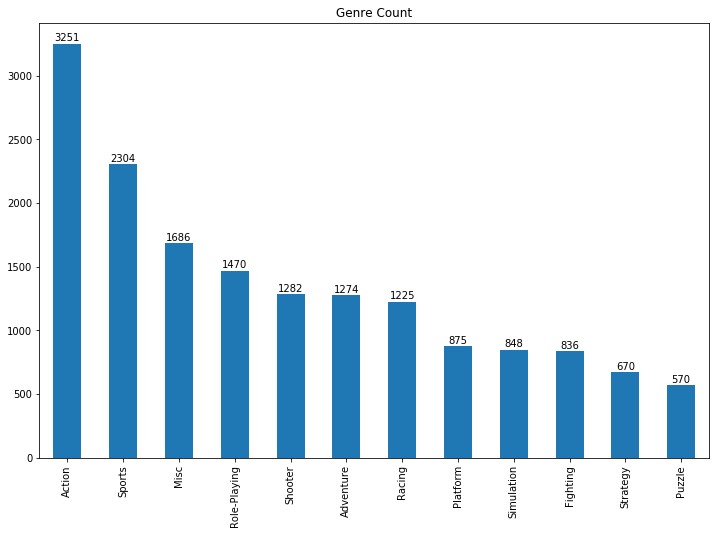

From the count above, we see that action has the most count of genre, sport is the next.


In [8]:
genre = pd.DataFrame(vgsales['Genre'].value_counts())
genre.plot(kind='bar',figsize = (12,8),title = 'Genre Count',legend = False)

a = np.arange(len(vgsales))
for index,count in zip(a,genre['Genre']):
    plt.text(index,count+20,count,ha='center')
    
plt.show()
print('From the count above, we see that action has the most count of genre, sport is the next.')

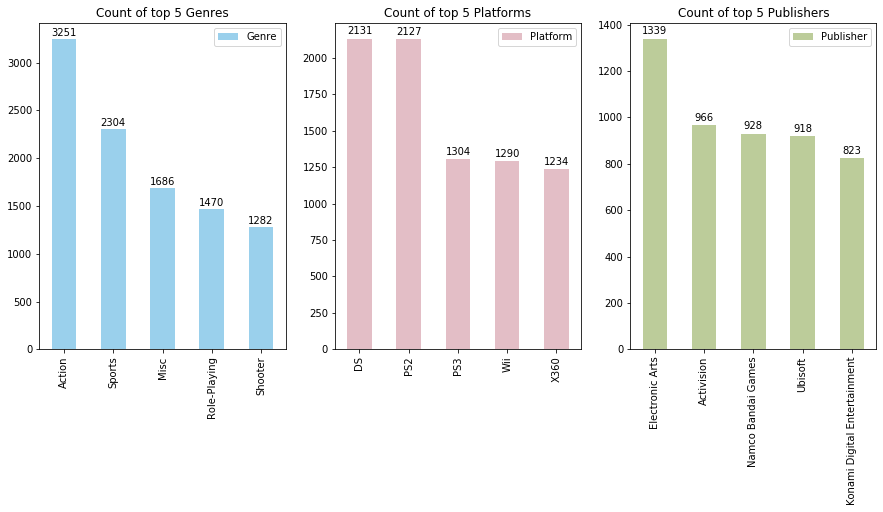

From the graphs above, we see DS and PS2 have the most count of platform; EA and Activison have the most count of publishers.


In [10]:
f,ax = plt.subplots(1,3,figsize=(15,6))
genre = pd.DataFrame(vgsales['Genre'].value_counts()[:5])
platform = pd.DataFrame(vgsales['Platform'].value_counts()[:5])
publisher = pd.DataFrame(vgsales['Publisher'].value_counts()[:5])

genre.plot(kind = 'bar',color = '#9AD0EC',title = 'Count of top 5 Genres',ax=ax[0])
for index,count in zip(a,genre['Genre']):
    ax[0].text(index,count+30,count,ha='center')

platform.plot(kind = 'bar',color = '#E3BEC6',title = 'Count of top 5 Platforms',ax=ax[1])
for index,count in zip(a,platform['Platform']):
    ax[1].text(index,count+30,count,ha='center')

publisher.plot(kind = 'bar',color = '#BCCC9A',title = 'Count of top 5 Publishers',ax=ax[2])
for index,count in zip(a,publisher['Publisher']):
    ax[2].text(index,count+20,count,ha='center')

plt.show()
print('From the graphs above, we see DS and PS2 have the most count of platform; EA and Activison have the most count of publishers.')

#### Genre, Type and Platform of Games by Sales

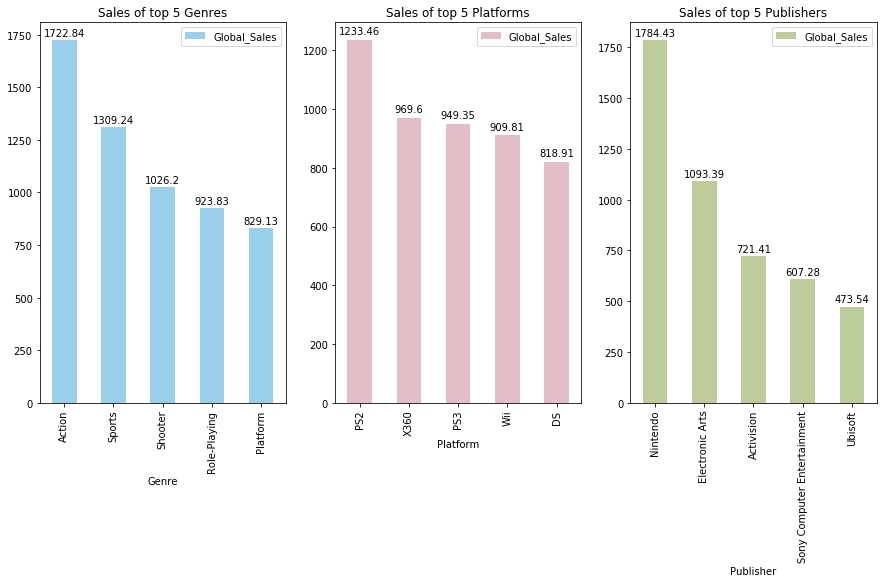

From sum of sales, we see Action is the most popular genre, PS2 is the most popular platform; Nitendo is the most popular publisher.


In [11]:
f,ax = plt.subplots(1,3,figsize=(15,7))
genre = pd.DataFrame(vgsales.groupby('Genre')['Global_Sales'].sum()).sort_values(by='Global_Sales',ascending= False)[:5]
platform = pd.DataFrame(vgsales.groupby('Platform')['Global_Sales'].sum()).sort_values(by='Global_Sales',ascending= False)[:5]
publisher = pd.DataFrame(vgsales.groupby('Publisher')['Global_Sales'].sum()).sort_values(by='Global_Sales',ascending= False)[:5]

genre.plot(kind = 'bar',color = '#9AD0EC',title = 'Sales of top 5 Genres',ax=ax[0])
for index,count in zip(a,round(genre['Global_Sales'],2)):
    ax[0].text(index,count+20,count,ha='center')

platform.plot(kind = 'bar',color = '#E3BEC6',title = 'Sales of top 5 Platforms',ax=ax[1])
for index,count in zip(a,round(platform['Global_Sales'],2)):
    ax[1].text(index,count+20,count,ha='center')

publisher.plot(kind = 'bar',color = '#BCCC9A',title = 'Sales of top 5 Publishers',ax=ax[2])
for index,count in zip(a,round(publisher['Global_Sales'],2)):
    ax[2].text(index,count+20,count,ha='center')

plt.show()
print('From sum of sales, we see Action is the most popular genre, PS2 is the most popular platform; Nitendo is the most popular publisher.')

#### Genre, Type and Platform of Games by Region

In [12]:
df = vgsales.groupby('Genre')[['Global_Sales','EU_Sales','JP_Sales','NA_Sales']].sum().reset_index()

df['NA'] = df['NA_Sales']/df['Global_Sales']
df['JP'] = df['JP_Sales']/df['Global_Sales']
df['EU'] = df['EU_Sales']/df['Global_Sales']

display(pd.DataFrame(vgsales.groupby('Genre')['NA_Sales'].sum()).sort_values(by='NA_Sales',ascending= False)[:2].reset_index())
display(pd.DataFrame(vgsales.groupby('Genre')['JP_Sales'].sum()).sort_values(by='JP_Sales',ascending= False)[:2].reset_index())
display(pd.DataFrame(vgsales.groupby('Genre')['EU_Sales'].sum()).sort_values(by='EU_Sales',ascending= False)[:2].reset_index())

,Genre,NA_Sales
0,Action,861.77
1,Sports,670.09


,Genre,JP_Sales
0,Role-Playing,350.29
1,Action,158.65


,Genre,EU_Sales
0,Action,516.48
1,Sports,371.34


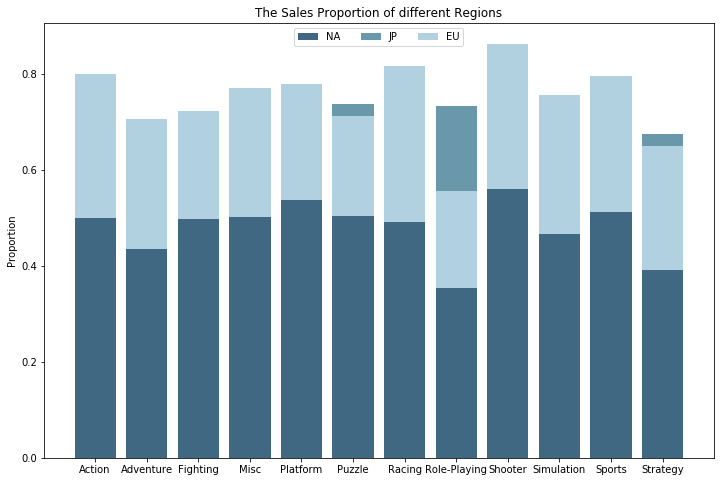

Sales in North America are all above average.
Role-Playing genre has more sales in Japan.
Action and Sports are more popular in Europe.


In [13]:
f,ax = plt.subplots(figsize=(12,8))
index = np.arange(len(df))

plt.bar(index,df.NA,color = '#406882')
plt.bar(index,df.JP,bottom = df.NA, color = '#6998AB')
plt.bar(index,df.EU,bottom = df.NA, color ='#B1D0E0')

plt.xticks(index,df.Genre)
plt.title('The Sales Proportion of different Regions')
plt.ylabel('Proportion')
plt.legend(['NA','JP','EU'],loc='upper center',ncol=3)
plt.show()

print('Sales in North America are all above average.\n'
      'Role-Playing genre has more sales in Japan.\n'
      'Action and Sports are more popular in Europe.')

In [14]:
df = pd.DataFrame()

In [15]:
df = vgsales.groupby('Platform')[['Global_Sales','EU_Sales','JP_Sales','NA_Sales']].sum().sort_values(by='Global_Sales',ascending= False)[:12].reset_index()

df['NA'] = df['NA_Sales']/df['Global_Sales']
df['JP'] = df['JP_Sales']/df['Global_Sales']
df['EU'] = df['EU_Sales']/df['Global_Sales']

display(pd.DataFrame(vgsales.groupby('Platform')['NA_Sales'].sum()).sort_values(by='NA_Sales',ascending= False)[:2].reset_index())
display(pd.DataFrame(vgsales.groupby('Platform')['JP_Sales'].sum()).sort_values(by='JP_Sales',ascending= False)[:2].reset_index())
display(pd.DataFrame(vgsales.groupby('Platform')['EU_Sales'].sum()).sort_values(by='EU_Sales',ascending= False)[:2].reset_index())

,Platform,NA_Sales
0,X360,594.33
1,PS2,572.92


,Platform,JP_Sales
0,DS,175.02
1,PS,139.78


,Platform,EU_Sales
0,PS3,340.47
1,PS2,332.63


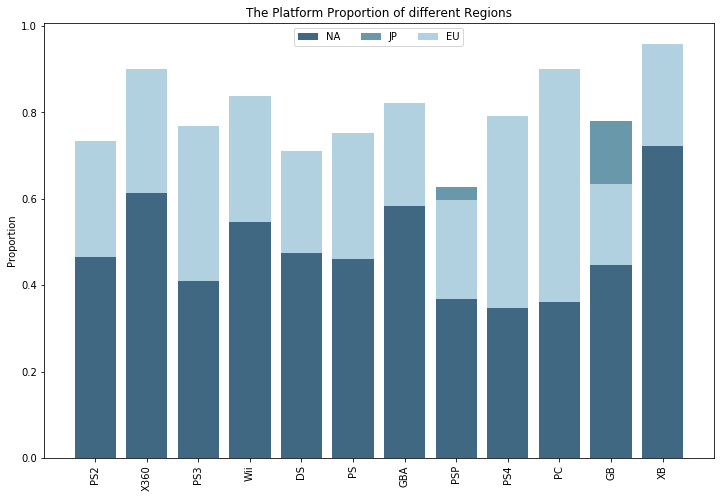

X360 and PS2 lead the sales in North America.
DS and PS lead the sales in Japan.
PS3 and PS2 lead the sales in Europe.


In [16]:
f,ax = plt.subplots(figsize=(12,8))
index = np.arange(len(df))

plt.bar(index,df.NA,color = '#406882')
plt.bar(index,df.JP,bottom = df.NA, color = '#6998AB')
plt.bar(index,df.EU,bottom = df.NA, color ='#B1D0E0')

plt.xticks(index,df.Platform,rotation=90)
plt.title('The Platform Proportion of different Regions')
plt.ylabel('Proportion')
plt.legend(['NA','JP','EU'],loc='upper center',ncol=3)
plt.show()

print('X360 and PS2 lead the sales in North America.\n'
      'DS and PS lead the sales in Japan.\n'
      'PS3 and PS2 lead the sales in Europe.')

In [17]:
df = pd.DataFrame()

In [18]:
df = vgsales.groupby('Publisher')[['Global_Sales','EU_Sales','JP_Sales','NA_Sales']].sum().sort_values(by='Global_Sales',ascending= False)[:12].reset_index()

df['NA'] = df['NA_Sales']/df['Global_Sales']
df['JP'] = df['JP_Sales']/df['Global_Sales']
df['EU'] = df['EU_Sales']/df['Global_Sales']

display(df.groupby('Publisher')[['NA']].sum().sort_values(by='NA',ascending = False).reset_index()[:2])
display(df.groupby('Publisher')[['JP']].sum().sort_values(by='JP',ascending = False).reset_index()[:2])
display(df.groupby('Publisher')[['EU']].sum().sort_values(by='EU',ascending = False).reset_index()[:2])

,Publisher,NA
0,Microsoft Game Studios,0.632044
1,THQ,0.612736


,Publisher,JP
0,Namco Bandai Games,0.500059
1,Capcom,0.336984


,Publisher,EU
0,Ubisoft,0.344279
1,Electronic Arts,0.336001


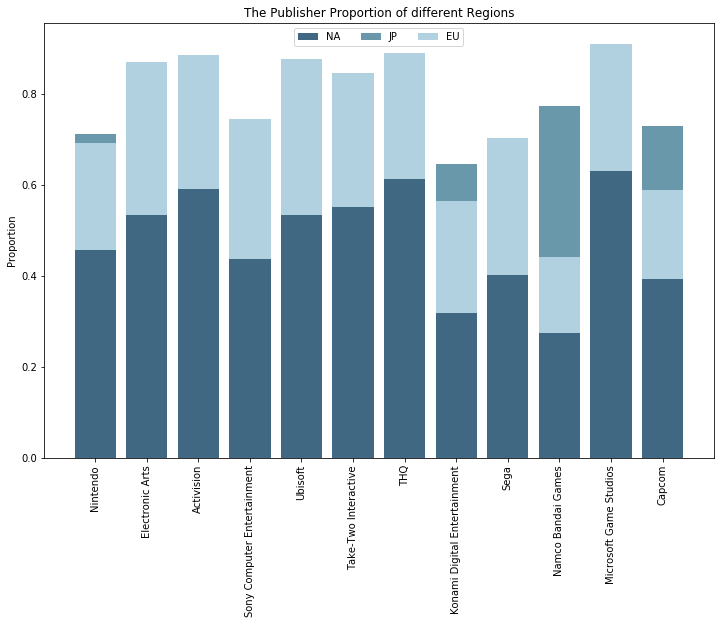

Microsoft Game Studios and THQ are more popular in North America.
Namco Bandai Games and Capcom are more popular in Japan.
Ubisoft and Electronic Arts are more popular in Europe.


In [19]:
f,ax = plt.subplots(figsize=(12,8))
index = np.arange(len(df))

plt.bar(index,df.NA,color = '#406882')
plt.bar(index,df.JP,bottom = df.NA, color = '#6998AB')
plt.bar(index,df.EU,bottom = df.NA, color ='#B1D0E0')

plt.xticks(index,df.Publisher,rotation=90)
plt.title('The Publisher Proportion of different Regions')
plt.ylabel('Proportion')
plt.legend(['NA','JP','EU'],loc='upper center',ncol=3)
plt.show()

print('Microsoft Game Studios and THQ are more popular in North America.\n'
      'Namco Bandai Games and Capcom are more popular in Japan.\n'
      'Ubisoft and Electronic Arts are more popular in Europe.')